In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df_new=pd.read_csv("D:\\Work\\Aline\\Project_DA_JV\\Fichiers csv\\vgsales_cleaned.csv")

In [4]:
df_new.head()

Rank                           Name                      basename  \
0     1                     Wii Sports                    wii-sports   
1     2              Super Mario Bros.              super-mario-bros   
2     3                 Mario Kart Wii                mario-kart-wii   
3     4  PlayerUnknown's Battlegrounds  playerunknowns-battlegrounds   
4     5              Wii Sports Resort             wii-sports-resort   

      Genre Platform         Publisher         Developer    Year  \
0    Sports      Wii          Nintendo      Nintendo EAD  2006.0   
1  Platform      NES          Nintendo      Nintendo EAD  1985.0   
2    Racing      Wii          Nintendo      Nintendo EAD  2008.0   
3   Shooter       PC  PUBG Corporation  PUBG Corporation  2017.0   
4    Sports      Wii          Nintendo      Nintendo EAD  2009.0   

   Estimated_Sales  
0            82.86  
1            40.24  
2            37.14  
3            36.60  
4            33.09

In [5]:
df_new.isna().sum()

Rank                 0
Name                 0
basename             0
Genre                0
Platform             0
Publisher          581
Developer          651
Year                29
Estimated_Sales      0
dtype: int64

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21233 entries, 0 to 21232
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             21233 non-null  int64  
 1   Name             21233 non-null  object 
 2   basename         21233 non-null  object 
 3   Genre            21233 non-null  object 
 4   Platform         21233 non-null  object 
 5   Publisher        20652 non-null  object 
 6   Developer        20582 non-null  object 
 7   Year             21204 non-null  float64
 8   Estimated_Sales  21233 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.5+ MB


In [7]:
df_new.duplicated().sum()

0

In [8]:
df_final=df_new.dropna(axis=0, how="any")

In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20050 entries, 0 to 21232
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             20050 non-null  int64  
 1   Name             20050 non-null  object 
 2   basename         20050 non-null  object 
 3   Genre            20050 non-null  object 
 4   Platform         20050 non-null  object 
 5   Publisher        20050 non-null  object 
 6   Developer        20050 non-null  object 
 7   Year             20050 non-null  float64
 8   Estimated_Sales  20050 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.5+ MB


In [10]:
global_sales2 = df_final.groupby(['Publisher']).agg({'Estimated_Sales': 'sum'})

global_games2 = df_final.groupby(['Publisher']).agg({'Name': 'count'})

global_sales2 = global_sales2.join(global_games2).sort_values(
    by='Estimated_Sales', ascending=False).head(15)

In [11]:
fig5 = go.Figure()
fig5.add_traces([go.Bar(name='Ventes',
                       x=global_sales2.index,
                       y=global_sales2['Estimated_Sales'], marker_color="#ff3939"),
                 go.Bar(name='Nombre de jeux',
                       x=global_sales2.index,
                       y=global_sales2['Name'], marker_color='#00ce00')])

fig5.update_layout(title="Nombre de jeux et ventes totales par Publisher")

fig5.show();

In [12]:
sales_genre = df_final.groupby(['Genre']).agg({'Estimated_Sales': 'sum'})

genre_name = df_final.groupby(['Genre']).agg({'Name': 'count'})

sales_genre = sales_genre.join(genre_name).sort_values(
    by='Estimated_Sales', ascending=False).head(15)

In [13]:
fig6 = go.Figure()
fig6.add_traces(go.Bar(name='Ventes',
                       x=sales_genre.index,
                       y=sales_genre['Estimated_Sales'], marker_color="cornflowerblue"))

fig6.update_layout(title="Ventes totales par genre de jeu")

fig6.show();

In [14]:
#Les 2 genres de jeux qui se vendent le plus sont Action et Sports, suivis par les jeux de tirs (shooter). Les jeux de musique
#et de fête (Music & Party) sont ceux qui se vendent le moins parmi les 15 genres les plus importants.

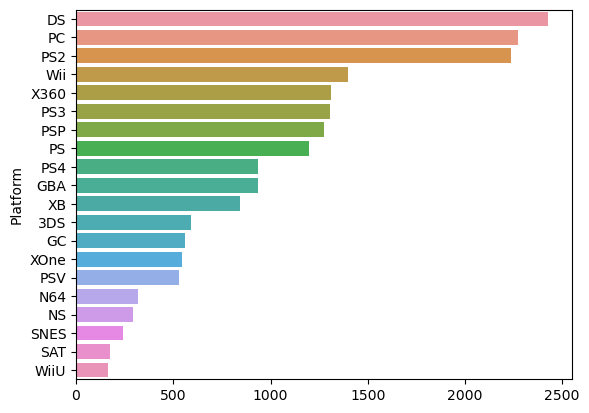

In [15]:
df_platform2=df_final["Platform"].value_counts().head(20)
sns.barplot(y=df_platform2.index, x=df_platform2.values);

In [16]:
global_sales2["Estimated_Sales"].sort_values(ascending=False).head(10)

Publisher
Nintendo                       1988.52
Activision                      730.11
Electronic Arts                 667.68
Sony Computer Entertainment     554.68
EA Sports                       497.62
Ubisoft                         496.81
THQ                             339.87
Sega                            301.39
Rockstar Games                  273.85
Capcom                          272.16
Name: Estimated_Sales, dtype: float64

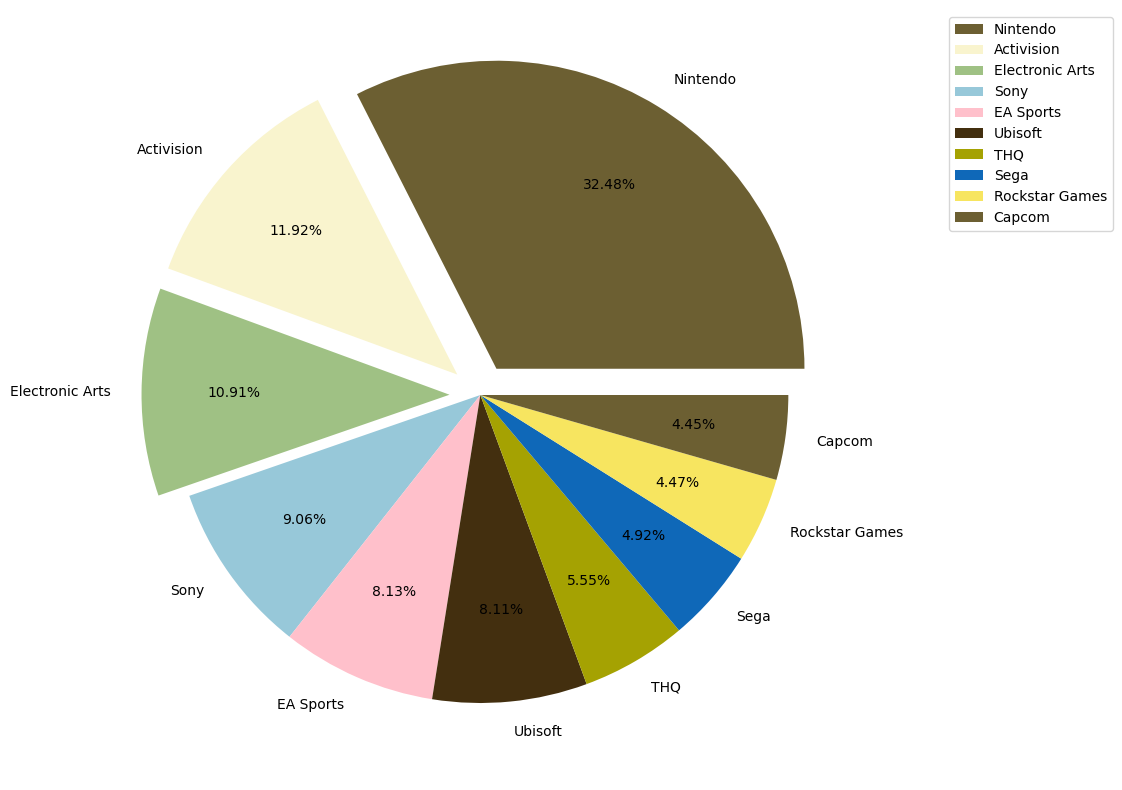

In [17]:
plt.figure(figsize=(10,10))
plt.pie(global_sales2.head(10).Estimated_Sales, labels=["Nintendo", "Activision", "Electronic Arts", "Sony", "EA Sports", "Ubisoft", "THQ", "Sega", "Rockstar Games", "Capcom"],
       colors=["#6c5f32","#f9f4ce","#9fc184","#97c8d9","pink","#432f0f","#a5a202","#0f68b8","#f7e560"], explode=[0.1,0.1,0.1,0,0,0,0,0,0,0],
        autopct=lambda x:round(x,2).astype(str)+"%", pctdistance=0.7, labeldistance=1.1)
plt.title=('Répartition des ventes globales par publisher')
plt.legend(bbox_to_anchor=(1.1,1), loc="upper left")
plt.show()

In [18]:
# Commentaire: Nintendo, EA et Activision représentent à eux 3 près de 55% des ventes globales de jeux vidéo,
# sur les 10 premiers éditeurs de jeux en termes de ventes, Nintendo représentant à lui seul 32.5% de parts de marché.

In [19]:
global_sales2.Name.sort_values(ascending=False).head(10)

Publisher
Activision                     1049
Ubisoft                        1028
Electronic Arts                 860
Konami                          789
Nintendo                        768
THQ                             740
Sega                            718
Sony Computer Entertainment     644
EA Sports                       544
Capcom                          520
Name: Name, dtype: int64

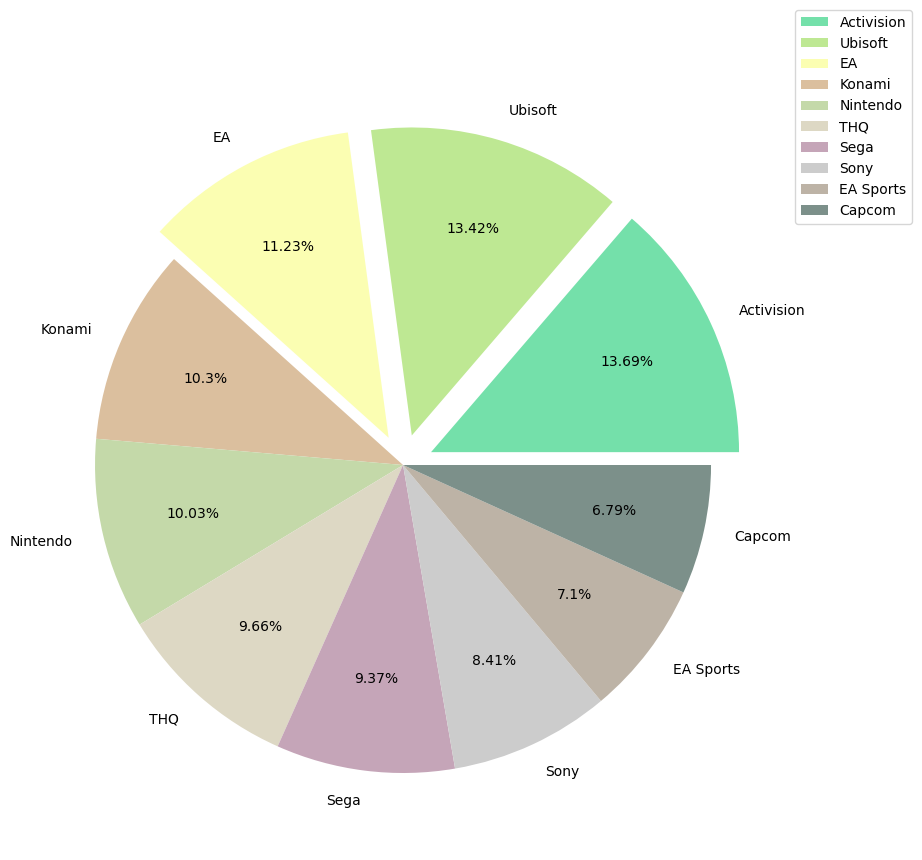

In [20]:
plt.figure(figsize=(10,10))
plt.pie(global_sales2.Name.sort_values(ascending=False).head(10), labels=["Activision", "Ubisoft", "EA", "Konami", "Nintendo", "THQ", "Sega", "Sony", "EA Sports", "Capcom"],
       colors=["#74e0aa","#bee893","#fbfeb2","#dbbf9e","#c4d9a9","#ddd8c4","#c5a5b8","#cccccc","#bdb3a6","#7c908a"], explode=[0.1,0.1,0.1,0,0,0,0,0,0,0],
        autopct=lambda x:round(x,2).astype(str)+"%", pctdistance=0.7, labeldistance=1.1)
plt.title=('Répartition du nombre de jeux par éditeurs')
plt.legend(bbox_to_anchor=(1,1.1), loc="upper left")
plt.show()

In [21]:
# Ce qui est intéressant ici, c'est qu'en termes de nombres de jeux sortis, il y a moins de position monopolistique.
# Les 3 éditeurs ayant sortis le plus de titres représentent un peu moins de 40% de la totalité des 10 premiers éditeurs
# par nombre de jeux. Activision étant le plus gros avec environ 14% des jeux. La comparaison avec le camembert précédent permet
# de montrer que ce n'est pas parce qu'un éditeur sort beaucoup de jeux qu'il a les plus grosses ventes. Nintendo a sorti 3%
# moins de titres par rapport à Activision mais a réalisé 20% de ventes globales en plus.

In [22]:
#Test Anova entre l'estimated_sales et le type de plateforme
#H0 : il n'y a pas d'effet significatif du type de plateforme sur les ventes
#H1 : il y a un effet significatif du type de plateforme sur les ventes

In [23]:
import statsmodels.api
result=statsmodels.formula.api.ols("Estimated_Sales ~ Platform", data=df_final).fit()
table=statsmodels.api.stats.anova_lm(result)
print(table)

               df        sum_sq    mean_sq          F         PR(>F)
Platform     39.0   1516.739941  38.890768  16.421092  6.327366e-108
Residual  20010.0  47390.529880   2.368342        NaN            NaN


In [24]:
# La p-value étant inférieure à 5%, alors on rejette H0 et on conlut H1 : la plateforme a un effet significatif sur les ventes

In [25]:
#Voyons si l'année de sortie a un effet sur les ventes avec un test de Pearson
#H0 : l'année n'a pas de corrélation sur les ventes
#H1 : l'année a une corrélation sur les ventes

In [26]:
from scipy.stats import pearsonr
pearsonr(x=df_final['Year'], y=df_final['Estimated_Sales'])

PearsonRResult(statistic=-0.05410550360981473, pvalue=1.7693212338295178e-14)

In [27]:
# La p-value étant inférieure à 5%, alors on rejette H0 et on conlut H1 : l'année a un effet sur les ventes

In [28]:
#Test Anova entre l'estimated_sales et les genres des jeux
#H0 : il n'y a pas d'effet significatif du genre des jeux sur les ventes
#H1 : il y a un effet significatif du genre des jeux sur les ventes

In [29]:
result2=statsmodels.formula.api.ols("Estimated_Sales ~ Genre", data=df_final).fit()
table=statsmodels.api.stats.anova_lm(result2)
print(table)

               df        sum_sq    mean_sq          F        PR(>F)
Genre        19.0    673.194551  35.431292  14.713432  7.117118e-48
Residual  20030.0  48234.075271   2.408092        NaN           NaN


In [30]:
# La p-value étant inférieure à 5%, alors on rejette H0 et on conlut H1 : le genre du jeu a un effet significatif sur les ventes

In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20050 entries, 0 to 21232
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             20050 non-null  int64  
 1   Name             20050 non-null  object 
 2   basename         20050 non-null  object 
 3   Genre            20050 non-null  object 
 4   Platform         20050 non-null  object 
 5   Publisher        20050 non-null  object 
 6   Developer        20050 non-null  object 
 7   Year             20050 non-null  float64
 8   Estimated_Sales  20050 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.5+ MB


In [32]:
df_final=df_final.drop("basename", axis=1)
#j'ai retiré la variable basename qui n'apporte pas plus d'infos.

In [33]:
df_final.head()

Rank                           Name     Genre Platform         Publisher  \
0     1                     Wii Sports    Sports      Wii          Nintendo   
1     2              Super Mario Bros.  Platform      NES          Nintendo   
2     3                 Mario Kart Wii    Racing      Wii          Nintendo   
3     4  PlayerUnknown's Battlegrounds   Shooter       PC  PUBG Corporation   
4     5              Wii Sports Resort    Sports      Wii          Nintendo   

          Developer    Year  Estimated_Sales  
0      Nintendo EAD  2006.0            82.86  
1      Nintendo EAD  1985.0            40.24  
2      Nintendo EAD  2008.0            37.14  
3  PUBG Corporation  2017.0            36.60  
4      Nintendo EAD  2009.0            33.09

In [34]:
from numpy import random
df_final["Aleatoire"] = random.rand(len(df_final.index))

In [35]:
df_final.head(15)

Rank                                Name         Genre Platform  \
0      1                          Wii Sports        Sports      Wii   
1      2                   Super Mario Bros.      Platform      NES   
2      3                      Mario Kart Wii        Racing      Wii   
3      4       PlayerUnknown's Battlegrounds       Shooter       PC   
4      5                   Wii Sports Resort        Sports      Wii   
5      6  Pokemon Red / Green / Blue Version  Role-Playing       GB   
6      7               New Super Mario Bros.      Platform       DS   
7      8                              Tetris        Puzzle       GB   
8      9           New Super Mario Bros. Wii      Platform      Wii   
9     10                           Minecraft          Misc       PC   
10    11                           Duck Hunt       Shooter      NES   
11    12                            Wii Play          Misc      Wii   
12    13                  Kinect Adventures!         Party     X360   
13    14                          Nintendogs    Simulation       DS   
14    15                       Mario Kart DS        Racing       DS   

                 Publisher              Developer    Year  Estimated_Sales  \
0                 Nintendo           Nintendo EAD  2006.0            82.86   
1                 Nintendo           Nintendo EAD  1985.0            40.24   
2                 Nintendo           Nintendo EAD  2008.0            37.14   
3         PUBG Corporation       PUBG Corporation  2017.0            36.60   
4                 Nintendo           Nintendo EAD  2009.0            33.09   
5                 Nintendo             Game Freak  1998.0            31.38   
6                 Nintendo           Nintendo EAD  2006.0            30.80   
7                 Nintendo  Bullet Proof Software  1989.0            30.26   
8                 Nintendo           Nintendo EAD  2009.0            30.22   
9                   Mojang              Mojang AB  2010.0            30.01   
10                Nintendo          Nintendo R&D1  1985.0            28.31   
11                Nintendo           Nintendo EAD  2007.0            28.02   
12  Microsoft Game Studios    Good Science Studio  2010.0            24.00   
13                Nintendo           Nintendo EAD  2005.0            23.96   
14                Nintendo           Nintendo EAD  2005.0            23.60   

    Aleatoire  
0    0.311313  
1    0.348161  
2    0.228119  
3    0.261225  
4    0.570120  
5    0.063043  
6    0.232261  
7    0.013309  
8    0.126669  
9    0.737927  
10   0.144361  
11   0.167551  
12   0.008795  
13   0.823222  
14   0.414066

In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20050 entries, 0 to 21232
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             20050 non-null  int64  
 1   Name             20050 non-null  object 
 2   Genre            20050 non-null  object 
 3   Platform         20050 non-null  object 
 4   Publisher        20050 non-null  object 
 5   Developer        20050 non-null  object 
 6   Year             20050 non-null  float64
 7   Estimated_Sales  20050 non-null  float64
 8   Aleatoire        20050 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.5+ MB


In [37]:
import re
Name=""
for comment in df_final.Name:
    Name+=comment


In [38]:
print(Name)

Wii SportsSuper Mario Bros.Mario Kart WiiPlayerUnknown's BattlegroundsWii Sports ResortPokemon Red / Green / Blue VersionNew Super Mario Bros.TetrisNew Super Mario Bros. WiiMinecraftDuck HuntWii PlayKinect Adventures!NintendogsMario Kart DSPokemon Gold / Silver VersionWii FitWii Fit PlusSuper Mario WorldGrand Theft Auto VGrand Theft Auto VBrain Age: Train Your Brain in Minutes a DaySuper Mario LandMario Kart 7Pokemon Diamond / Pearl VersionGrand Theft Auto: San AndreasSuper Mario Bros. 3Pokemon X/YPokemon Ruby / Sapphire VersionGrand Theft Auto: Vice CityPokemon Sun/MoonGrand Theft Auto VPokemon Black / White VersionCall of Duty: Black Ops 3Mario Kart 8 DeluxeCounter-Strike: SourceSonic the HedgehogGran Turismo 3: A-SpecBrain Age 2: More Training in Minutes a DayCall of Duty: Modern Warfare 3Call of Duty: Black OpsPokemon Yellow: Special Pikachu EditionHalo 3Pokemon Omega Ruby/Pokemon Alpha SapphireRed Dead Redemption 2Call of Duty: Black Ops IICall of Duty: Black Ops IISuper Mario Ody

In [39]:
r=re.compile(r"Mario+")
Mario=r.findall(Name)
print('Nombre de fois où Mario apparaît dans un titre:', Mario.count("Mario"))

Nombre de fois où Mario apparaît dans un titre: 134


In [40]:
r=re.compile(r"Sims+")
Sims=r.findall(Name)
print('Nombre de fois où Sims apparaît dans un titre:', Sims.count("Sims"))

Nombre de fois où Sims apparaît dans un titre: 106


In [41]:
r=re.compile(r"Zelda+")
Zelda=r.findall(Name)
print('Nombre de fois où Zelda apparaît dans un titre:', Zelda.count("Zelda"))

Nombre de fois où Zelda apparaît dans un titre: 31


In [42]:
r=re.compile(r"Pokemon+")
Pokemon=r.findall(Name)
print('Nombre de fois où Pokemon apparaît dans un titre:', Pokemon.count("Pokemon"))

Nombre de fois où Pokemon apparaît dans un titre: 59


In [43]:
r=re.compile(r"Tekken+")
Tekken=r.findall(Name)
print('Nombre de fois où Tekken apparaît dans un titre:', Tekken.count("Tekken"))

Nombre de fois où Tekken apparaît dans un titre: 23


In [44]:
r=re.compile(r"FIFA+")
fifa=r.findall(Name)
print('Nombre de fois où FIFA apparaît dans un titre:', fifa.count("FIFA"))

Nombre de fois où FIFA apparaît dans un titre: 162


In [45]:
r=re.compile(r"Assassin+")
Assassin=r.findall(Name)
print('Nombre de fois où Assassin apparaît dans un titre:', Assassin.count("Assassin"))

Nombre de fois où Assassin apparaît dans un titre: 68


In [46]:
r=re.compile(r"Naruto+")
Naruto=r.findall(Name)
print('Nombre de fois où Naruto apparaît dans un titre:', Naruto.count("Naruto"))

Nombre de fois où Naruto apparaît dans un titre: 72


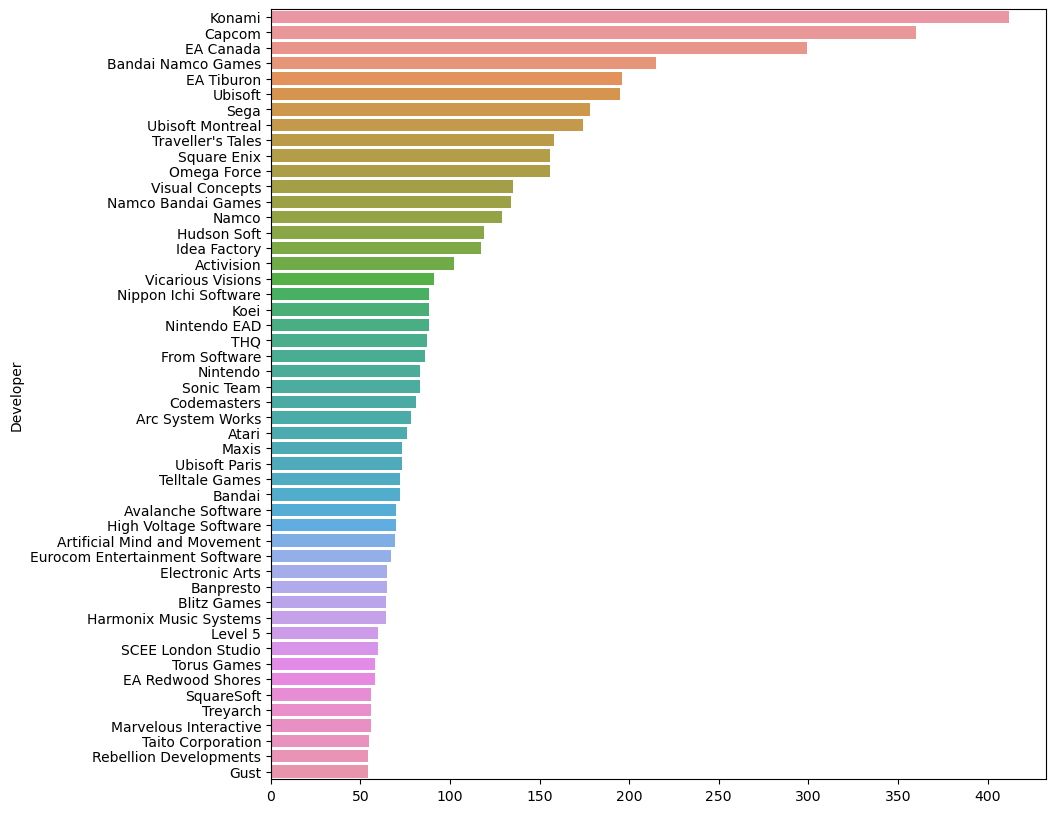

In [47]:
df_developer=df_final["Developer"].value_counts(ascending=False).head(50)
plt.figure(figsize=(10,10))
sns.barplot(y=df_developer.index, x=df_developer.values)
plt.show()

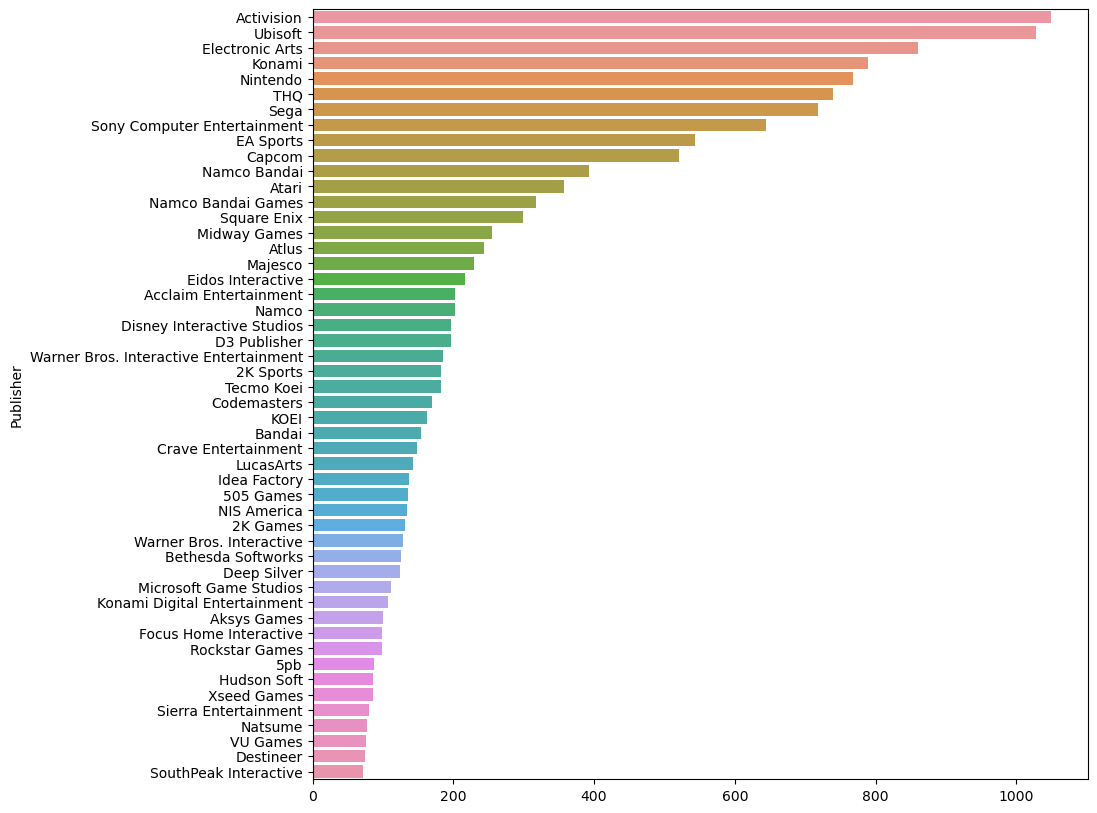

In [48]:
df_publisher=df_final["Publisher"].value_counts(ascending=False).head(50)
plt.figure(figsize=(10,10))
sns.barplot(y=df_publisher.index, x=df_publisher.values)
plt.show()

In [51]:
df_video_games=pd.read_csv("D:\\Work\\Aline\\Project_DA_JV\\Fichiers csv\\vgsales_cleaned_franchise_random.csv")

In [52]:
df_video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21233 entries, 0 to 21232
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             21233 non-null  int64  
 1   Name             21233 non-null  object 
 2   Franchise        21233 non-null  object 
 3   basename         21233 non-null  object 
 4   Genre            21233 non-null  object 
 5   Platform         21233 non-null  object 
 6   Publisher        20652 non-null  object 
 7   Developer        20582 non-null  object 
 8   Year             21204 non-null  float64
 9   Random_Values    21233 non-null  float64
 10  Estimated_Sales  21233 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.8+ MB


In [53]:
df_video_games.head()

Rank                           Name            Franchise  \
0     1                     Wii Sports  Undefined Franchise   
1     2              Super Mario Bros.                Mario   
2     3                 Mario Kart Wii                Mario   
3     4  PlayerUnknown's Battlegrounds  Undefined Franchise   
4     5              Wii Sports Resort  Undefined Franchise   

                       basename     Genre Platform         Publisher  \
0                    wii-sports    Sports      Wii          Nintendo   
1              super-mario-bros  Platform      NES          Nintendo   
2                mario-kart-wii    Racing      Wii          Nintendo   
3  playerunknowns-battlegrounds   Shooter       PC  PUBG Corporation   
4             wii-sports-resort    Sports      Wii          Nintendo   

          Developer    Year  Random_Values  Estimated_Sales  
0      Nintendo EAD  2006.0       0.961891            82.86  
1      Nintendo EAD  1985.0       0.648642            40.24  
2      Nintendo EAD  2008.0       0.429207            37.14  
3  PUBG Corporation  2017.0       0.089494            36.60  
4      Nintendo EAD  2009.0       0.056380            33.09

In [54]:
global_sales2 = df_video_games.groupby(['Franchise']).agg({'Estimated_Sales': 'sum'})



In [55]:
global_sales2["Estimated_Sales"].sort_values(ascending=False).head(15)

Franchise
Undefined Franchise    5430.83
Mario                   624.62
Pokemon                 304.24
Call of Duty            301.86
FIFA                    212.18
Grand Theft Auto        185.16
Star Wars               142.69
Madden NFL              136.63
Final Fantasy           128.52
Need for Speed          104.82
The Legend of Zelda      99.17
Assassin's Creed         98.84
Gran Turismo             87.26
NBA 2K                   74.17
Minecraft                72.13
Name: Estimated_Sales, dtype: float64

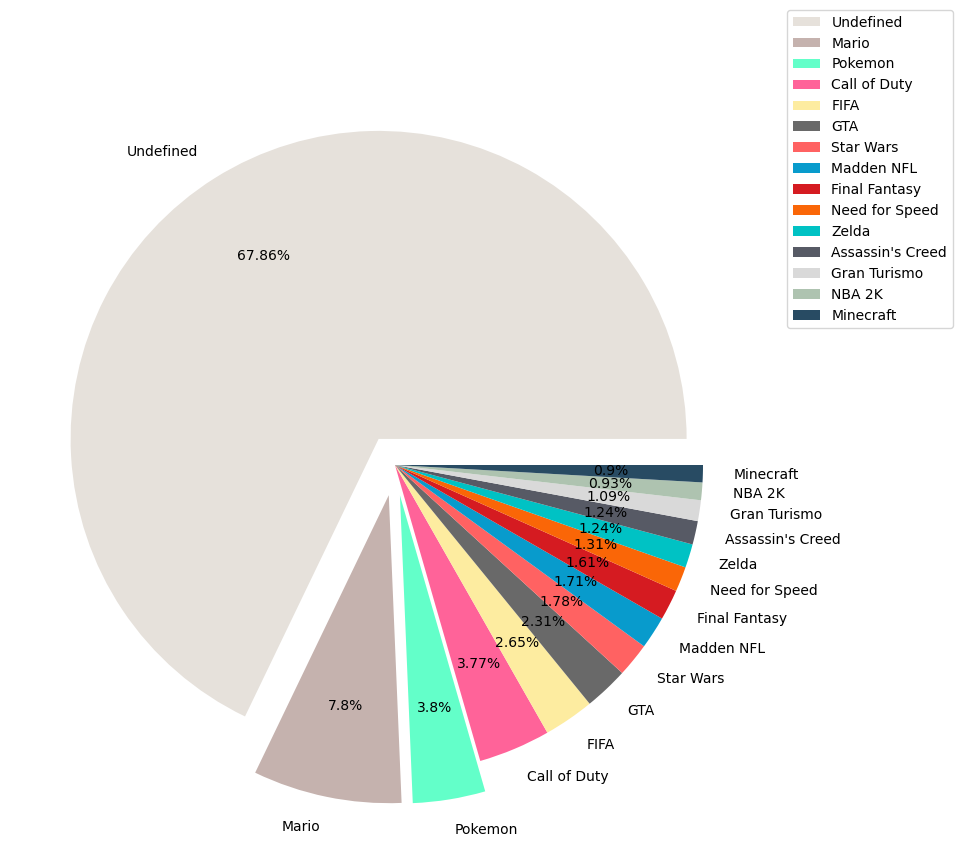

In [56]:
plt.figure(figsize=(10,10))
plt.pie(global_sales2["Estimated_Sales"].sort_values(ascending=False).head(15), labels=["Undefined", "Mario", "Pokemon", "Call of Duty", "FIFA", "GTA", "Star Wars", "Madden NFL", "Final Fantasy", "Need for Speed","Zelda","Assassin's Creed","Gran Turismo","NBA 2K","Minecraft"],
       colors=["#e6e1db","#c5b2ae","#63ffc9","#ff6399","#fdeca0","#696969","#ff6262","#089bcc","#d51b21","#fa6607","#00c2c4","#575a65","#d9d9d9","#aec3b0","#284b63"], explode=[0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0],
        autopct=lambda x:round(x,2).astype(str)+"%", pctdistance=0.7, labeldistance=1.1)
plt.title=('Répartition des licences par total de ventes')
plt.legend(bbox_to_anchor=(1,1.1), loc="upper left")
plt.show()

In [57]:
df_video_games["Franchise"].value_counts(ascending=False).head(20)

Franchise
Undefined Franchise     17369
FIFA                      161
Star Wars                 134
Mario                     131
Final Fantasy             118
Gundam                    113
Madden NFL                101
Tom Clancy's               99
Need for Speed             86
The Sims                   86
Dragon Ball                82
Mega Man                   79
NBA 2K                     77
Resident Evil              75
Pro Evolution Soccer       74
Call of Duty               74
Batman                     71
Naruto                     69
Tales                      69
Spider-Man                 68
Name: count, dtype: int64

In [58]:
df_video_games["Publisher"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
21228    False
21229    False
21230    False
21231    False
21232    False
Name: Publisher, Length: 21233, dtype: bool

In [129]:
df_video_games=df_video_games.dropna(axis=0, how='any')